In [84]:
!git clone http://github.com/pjreddie/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [85]:
!cd darknet

/bin/bash: line 1: cd: darknet: Not a directory


In [86]:
!make

make: Nothing to be done for 'all'.


In [87]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-07-30 21:21:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.4’

yolov3.weights.4    100%[===================>] 236.52M  60.9MB/s    in 4.1s    

2023-07-30 21:21:22 (57.0 MB/s) - ‘yolov3.weights.4’ saved [248007048/248007048]



In [88]:
config='/content/darknet/cfg/yolov3.cfg'
weight='/content/darknet/yolov3.weights'

In [89]:
import cv2
import csv
import os
from google.colab.patches import cv2_imshow

In [90]:
net=cv2.dnn.readNet(weight,config)

In [91]:
class_label='/content/darknet/data/coco.names'

In [92]:
with open(class_label,'r') as f:
  class_lab=f.read().strip().split('\n')

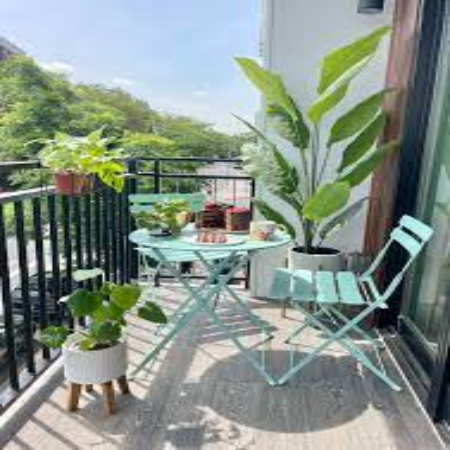

In [93]:
image='/content/darknet/src/bal2.jpg'
img=cv2.imread(image)
bigimg=cv2.resize(img,(450,450))
cv2_imshow(bigimg)
height,width=img.shape[:2]

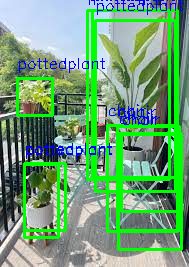

CSV file generated


In [94]:
obj=cv2.dnn.blobFromImage(img,scalefactor=1/255.0,size=(416, 416), swapRB=True, crop=False)
net.setInput(obj)
out_layer= net.getUnconnectedOutLayersNames()
detections= net.forward(out_layer)
csv_file='output.csv'
with open(csv_file,'w',newline='') as csvfile:
  csv_writer=csv.writer(csvfile)
  csv_writer.writerow(['Filename','Class','Top-left x coordinate','Top-left y coordinate','Bottom-right x coordinate','Bottom-right y coordinate'])
  for result in detections:
    for detec in result:
      scores=detec[5:]
      class_id=scores.argmax()
      confidence=scores[class_id]
      if confidence>0.5:
        center_x, center_y, box_width, box_height = detec[:4] * [width, height, width, height]
        x_min=int(center_x - box_width / 2)
        y_min=int(center_y - box_height / 2)
        x_max=int(center_x + box_width / 2)
        y_max=int(center_y + box_height / 2)

        csv_writer.writerow([os.path.basename(image),class_lab[class_id],x_min,y_min,x_max,y_max])

        cv2.rectangle(img,(x_min, y_min),(x_max, y_max),(0, 255, 0), 2)
        label = f"{class_lab[class_id]}"
        cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

  cv2_imshow(img)
print('CSV file generated')